## Hierarichal Clustering 

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline

In [15]:
# Load the iris dataset
iris = datasets.load_iris()

In [16]:
# Create a DataFrame

iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [17]:
# Check the first 5 rows
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [9]:
#iris_df.columns = iris.feature_names

In [18]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [20]:
## Standardize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [23]:
X_scaled = scaler.fit_transform(iris_df)
X_scaled
# Scaling the data will help in better clustering
#Fit_transform will fit the data and then transform it
#transform means it will scale the data
#fit means it will calculate the mean and standard deviation

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [25]:
X_scaled.shape

#it is 4 dimensional data because there are 4 features

(150, 4)

### -Now we wil convert 4dimensional data into 2 dimensional data using PCA

In [27]:
from sklearn.decomposition import PCA

In [35]:
pca = PCA(n_components=2)
pca

PCA(n_components=2)

In [36]:
pca_scaled = pca.fit_transform(X_scaled)

#difference between fit and fit_transform is that fit_transform will fit the data and then transform it and fit will only fit the data.
#We should use fit transfrom when we are using the data for the first time
#we should use fit when we are using the data for the second time

In [37]:
pca_scaled.shape

(150, 2)

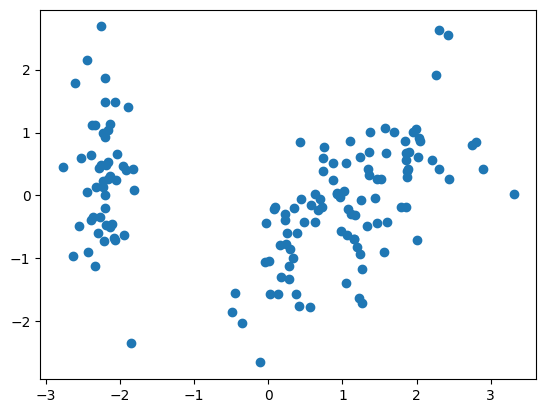

In [38]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

### -Now we will use Dendogram to find the optimal number of clusters and we will use Agglomerative Clustering

In [39]:
import scipy.cluster.hierarchy as sc 


#scipy is a library which is used to perform scientific and technical computing

Text(0, 0.5, 'Euclidean Distance')

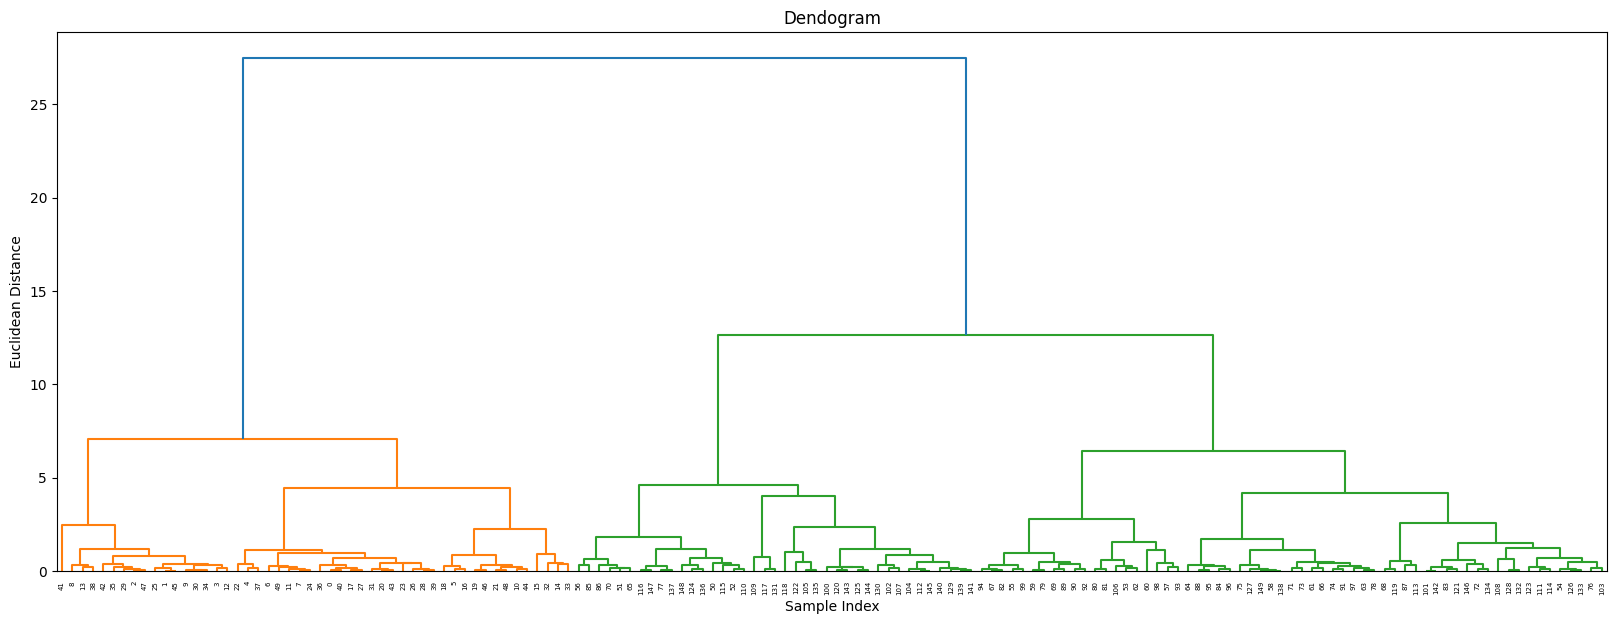

In [44]:
##plotting the dendogram

plt.figure(figsize=(20,7))
plt.title("Dendogram")

##Creating the dendogram

sc.dendrogram(sc.linkage(pca_scaled, method= 'ward'))
#in linkage we have to pass the data and method of clustering
#ward is the method of clustering which is used to minimize the variance of the clusters being merged]
plt.title("Dendogram")
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

### Agglomerative Clustering

In [46]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='ward')
#linkage is the method of clustering 
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [47]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

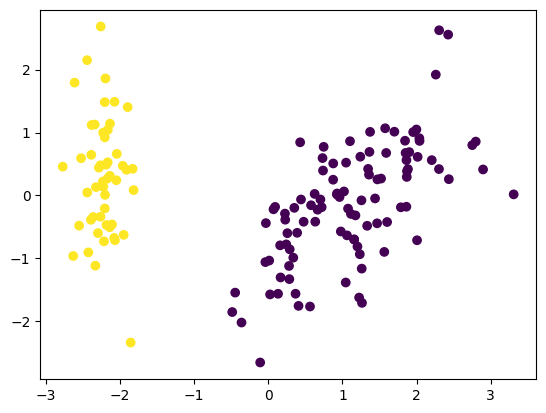

In [52]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [55]:
from sklearn.metrics import silhouette_score

In [57]:
silhouette_coef = []

## Notice you start at 2 clusters for silhouette coefficient

for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k, linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coef.append(score)

In [58]:
silhouette_coef

[0.5770346019475988,
 0.4466890410285909,
 0.4006363159855973,
 0.33058726295230545,
 0.31485480100512825,
 0.316969830299128,
 0.310946529007258,
 0.31143422475471655,
 0.3161120375980681]

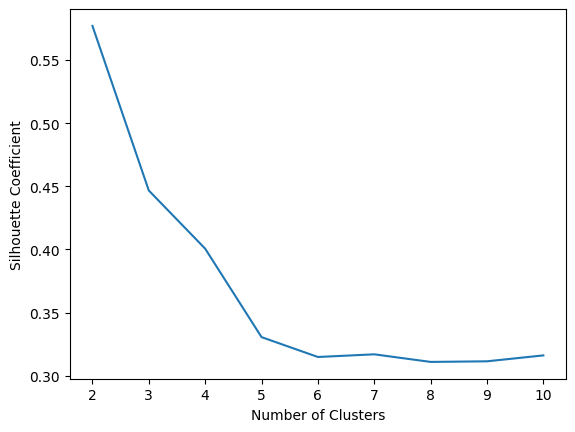

In [59]:
##plotting silhouette score

plt.plot(range(2,11),silhouette_coef)
plt.xticks(range(2,11))
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Coefficient')
plt.show()

In [60]:
## silhouette score is maximum at 2 clusters

In [61]:
agglo = AgglomerativeClustering(n_clusters=2, linkage='ward')

In [62]:
agglo.fit(X_scaled)

AgglomerativeClustering()

In [63]:
agglo.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

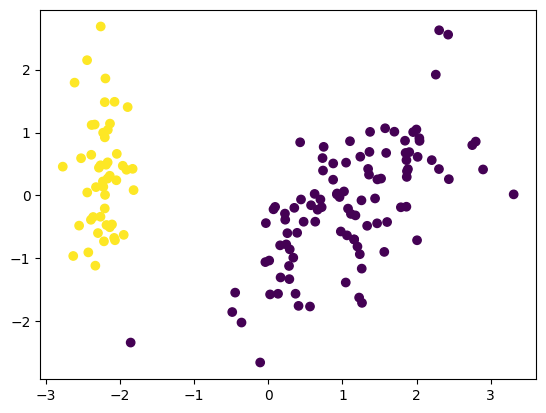

In [64]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=agglo.labels_)

In [65]:
from sklearn.metrics import silhouette_score

In [66]:
silhouette_score(X_scaled,agglo.labels_)

0.5770346019475988